In [130]:
import pandas as pd 
# default='warn', Used here to supress warning when slicing and creating high earners column
pd.options.mode.chained_assignment = None 


In [131]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [132]:
# custom function from Web_scrapper_League_Tables notebook 
from ipynb.fs.full.Web_scrapper_League_Tables import League_table_scraper

#### Getting data from the API

In [133]:
# API authorization
headers = {'x-api-key':'d15f7132973d404d9d046934398ee9e3', 'accept': 'application/json', 'accept': 'text/csv'}

# Choose endpoint
endpoint = 'https://www.capology.com/api/v2/soccer/salaries/be/first-division-a/2019-2020/'

# Retrieve json
json1 = requests.get(endpoint, headers = headers).text

#Data for 2019/2020
df1 = pd.read_json(json1)


df1 = df1[df1["season_term"] == "combined"]

In [134]:
# API authorization
headers = {'x-api-key':'d15f7132973d404d9d046934398ee9e3', 'accept': 'application/json', 'accept': 'text/csv'}

# Choose endpoint
endpoint = 'https://www.capology.com/api/v2/soccer/salaries/be/first-division-a/2020-2021/'

# Retrieve json
json2 = requests.get(endpoint, headers=headers).text

#Data for 2020/2021
df2 = pd.read_json(json2)


df2 = df2[df2["season_term"] == "combined"]

In [135]:
# API authorization
headers = {'x-api-key':'d15f7132973d404d9d046934398ee9e3', 'accept': 'application/json', 'accept': 'text/csv'}

# Choose endpoint
endpoint = 'https://www.capology.com/api/v2/soccer/salaries/be/first-division-a/2021-2022/'

# Retrieve json
json3 = requests.get(endpoint, headers=headers).text

#Data for 2021/2022
df3 = pd.read_json(json3)


df3 = df3[df3["season_term"] == "combined"]

In [136]:
# API authorization
headers = {'x-api-key':'d15f7132973d404d9d046934398ee9e3', 'accept': 'application/json', 'accept': 'text/csv'}

# Choose endpoint
endpoint = 'https://www.capology.com/api/v2/soccer/salaries/be/first-division-a/2022-2023/'

# Retrieve json
json4 = requests.get(endpoint, headers=headers).text

#Data for 2022/2023
df4 = pd.read_json(json4)

#Capology has defined the seson as summer
df4 = df4[df4["season_term"] == "summer"]

In [137]:
df = pd.concat([df1,df2,df3,df4],axis = 0).drop_duplicates()

#### Cleaning Data frame

In [138]:
df = df[df['salary_gross_eur'] != 0]

In [139]:
CODE_DICT = pd.Series(df.club_code.values,index=df.club_name).to_dict()


In [140]:
#Required columns
LIST = ['season_id','club_code','player_age','player_country_id','player_group_code','salary_gross_eur']

In [141]:
df_salary = df[LIST]
df_salary = df_salary.reset_index(drop = True)

In [142]:
df_salary.head()

,season_id,club_code,player_age,player_country_id,player_group_code,salary_gross_eur
0,2019-2020,AND,28,france,M,2000000
1,2019-2020,AND,20,belgium,M,130000
2,2019-2020,AND,26,honduras,D,1170000
3,2019-2020,AND,17,belgium,F,80000
4,2019-2020,AND,32,belgium,D,20000


#### Finding High Earners

In [143]:
# Group the data by 'club' and 'position'
groups = df_salary.groupby(['season_id','club_code', 'player_group_code'])
# Find the highest two values of column 'salary_gross_eur' for each group
top_two = groups['salary_gross_eur'].nlargest(2).reset_index()

# get needed indexes
index = list(top_two['level_3'])

# Add the result to the data frame as a new column
df_salary['high_earner'] = 0
for i in index:
    df_salary.loc[i, 'high_earner'] = 1

#### Creating  needed features

In [144]:
countries = df_salary.player_country_id.unique()

#based on uk.gov website excluding Belgium
EU_countries = ['Austria', 'Bulgaria', 'Croatia','Cyprus', 'Czech-Republic', 
              'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
              'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 
              'Romania', 'Slovakia', 'Slovenia', 'Spain','Sweden']

EU_countries = [s.lower() for s in EU_countries]

In [145]:
EU = []
non_EU = []
for country in countries:
    if country in EU_countries:
        EU.append(country) 
    elif country == 'belgium':
        pass
    else:
        non_EU.append(country) 


In [146]:
len(countries)-len(EU)-len(non_EU)

1

In [147]:
def set_region(row):
    """
    Function takes each row as argument and returns the region 
    based on the player_country_id.
    """
    
    if row['player_country_id'] in non_EU:
        return 'non_EU'
    
    elif row['player_country_id'] in EU:
        return 'EU'
    
    else:
        return 'belgium'

In [148]:
CODE_DICT

{'Anderlecht': 'AND',
 'Beveren': 'BEV',
 'Cercle Brugges': 'CER',
 'Charleroi': 'CHL',
 'Club Brugges': 'BRU',
 'Eupen': 'EUP',
 'Excel Mouscron': 'EXM',
 'Genk': 'GEK',
 'Gent': 'GNT',
 'Kortrijk': 'KOR',
 'Mechelen': 'MEC',
 'Oostende': 'OOS',
 'Royal Antwerp': 'ATW',
 'Sint-Truidense': 'SIT',
 'Standard Liege': 'STL',
 'Zulte Waregem': 'ZUW',
 'Beerschot VA': 'BEE',
 'Leuven': 'LEU',
 'Seraing': 'SER',
 'Union SG': 'USG',
 'Westerlo': 'WES'}

In [149]:
##Updating coding dicitionary as capology has differnt naming convention to Wikipedia
CODE_DICT['Club Brugge'] = 'BRU'
CODE_DICT['Antwerp'] = 'ATW'
CODE_DICT['Standard Liège'] = 'STL'
CODE_DICT['Sint-Truiden'] = 'SIT'
CODE_DICT['Cercle Brugge'] = 'CER'
CODE_DICT['Waasland-Beveren'] = 'BEV'
CODE_DICT['Beerschot'] = 'BEE'
CODE_DICT['OH Leuven'] = 'LEU'


In [150]:
# Final league standings 2019/2020
standings_2019 = League_table_scraper('https://en.wikipedia.org/wiki/2019%E2%80%9320_Belgian_First_Division_A',4)
standings_2019 = list(map(lambda x: CODE_DICT[x], standings_2019.club))

# Final league standings 2020/2021
standings_2020= League_table_scraper('https://en.wikipedia.org/wiki/2020%E2%80%9321_Belgian_First_Division_A',5)
standings_2020 = list(map(lambda x: CODE_DICT[x], standings_2020.club))

# Final league standings 2021/2022
standings_2021 = League_table_scraper('https://en.wikipedia.org/wiki/2021%E2%80%9322_Belgian_First_Division_A',5)
standings_2021 = list(map(lambda x: CODE_DICT[x], standings_2021.club))

# Current league standings 2022/2023
standings_2022 = League_table_scraper('https://en.wikipedia.org/wiki/2022%E2%80%9323_Belgian_Pro_League',5)
standings_2022 = list(map(lambda x: CODE_DICT[x], standings_2022.club))

In [151]:
def set_club_type(row):
    
    """
    Function takes each row as argument and returns
    top 2,top 5,mid-table, relagation based on the club 
    finishing position for the year
    
    """

    if (row['club_code'] in standings_2019[:2] and row['season_id']== '2019-2020') or (row['club_code'] in standings_2020[0:2] and row['season_id']=='2020-2021') or (row['club_code'] in standings_2021[0:2] and row['season_id']=='2021-2022') or (row['club_code'] in standings_2022[0:2] and row['season_id']=='2022-2023'):
        return 'top 2'
   
    if (row['club_code'] in standings_2019[2:5] and row['season_id']== '2019-2020') or (row['club_code'] in standings_2020[2:5] and row['season_id']=='2020-2021') or (row['club_code'] in standings_2021[2:5] and row['season_id']=='2021-2022') or (row['club_code'] in standings_2022[2:5] and row['season_id']=='2022-2023'):
        return 'top 5'
    
    if (row['club_code'] in standings_2019[5:15] and row['season_id']== '2019-2020') or (row['club_code'] in standings_2020[5:16] and row['season_id']=='2020-2021') or (row['club_code'] in standings_2021[5:16] and row['season_id']=='2021-2022') or (row['club_code'] in standings_2022[5:16] and row['season_id']=='2022-2023'):
        return 'mid-table'
    
    else :
        return 'relegation'


In [152]:
X = df_salary[['club_code', 'player_age', 'player_country_id', 'player_group_code','season_id','high_earner']]

X = X.assign(Age = pd.cut(X['player_age'], 
                               bins = [0, 17, 21,23, 27, 32,99], 
                               labels = ['U18', '18-21', '21-23','23-27','27-32','32+']))

X = X.assign(region = X.apply(set_region, axis = 1)).astype('category')

X = X.assign(club_level = X.apply(set_club_type,axis = 1)).astype('category')

X = X.drop('player_country_id',axis=1)
X = X.drop('player_age',axis=1)
X = X.drop('season_id',axis=1)

#### Preapring data frame for modelling


In [153]:
X = pd.get_dummies(data = X, drop_first = True)

In [154]:
Y = np.log(df_salary['salary_gross_eur'])

#### Fiiting the Model

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1290, 34)
(861, 34)
(1290,)
(861,)


In [156]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [157]:
X_test.to_csv(r'C:\Users\Ramya\X_test_be.csv')

In [158]:
print(model.intercept_)

11.651340995526205


In [159]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient']).reset_index()
coeff_parameter

,index,Coefficient
0,club_code_ATW,-0.286470
1,club_code_BEE,-1.505279
2,club_code_BEV,-0.891414
3,club_code_BRU,0.072831
4,club_code_CER,-1.101229
5,club_code_CHL,-0.989415
6,club_code_EUP,-0.878535
7,club_code_EXM,-1.184036
8,club_code_GEK,-0.310322
9,club_code_GNT,-0.495104


#### Model Evaluation

In [160]:
predictions = model.predict(X_test)
predictions

array([13.38020748, 12.14286374, 12.21494141, 12.21806353, 12.84176341,
       11.94113321, 11.64001615, 12.09914495, 11.18309687, 12.45463102,
       11.72644194, 11.78453915, 11.36438363, 11.11624749, 13.01469018,
       11.89346968, 12.30762837, 12.83672858, 14.11909292, 12.38155583,
       11.2825615 , 11.07971312, 12.14736609, 11.97280798, 12.26770814,
       10.90712566, 12.39741788, 12.50390162, 12.54640467, 13.57609475,
       12.19346474, 12.30700757, 11.92167711, 10.777103  , 12.99787241,
       11.25513176, 12.43969451, 12.11531573, 10.37766726, 13.40869928,
       13.0013592 , 10.74042147, 11.49497392, 12.10566212, 11.77977394,
       12.19944632, 12.03167249, 12.41779207, 12.91132864, 12.71237434,
       11.77183654, 13.8240536 , 11.20351209, 12.58424281, 12.96635044,
       10.95874534, 11.1985875 , 11.52351308, 12.56367391, 13.52102373,
       12.56135265, 11.395811  , 12.60192637, 12.30040353, 11.6679595 ,
       13.37568631, 13.23789846, 13.24368931, 11.12033049, 12.56

C:\Users\Ramya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary_gross_eur'>

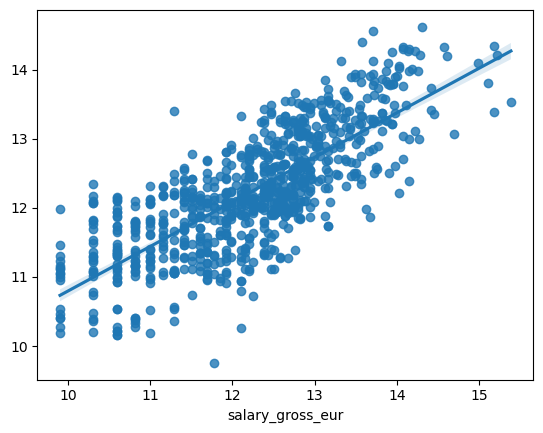

In [161]:
sns.regplot(y_test,predictions)

In [162]:
import statsmodels.api as sm
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:       salary_gross_eur   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.48
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          5.51e-273
Time:                        15:39:19   Log-Likelihood:                -1220.2
No. Observations:                1290   AIC:                             2510.
Df Residuals:                    1255   BIC:                             2691.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.65

#### Model Export

In [163]:
import pickle
pickle.dump(model, open('model_be.pkl','wb')) 